In [22]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [2]:
da = pd.read_csv('train.csv')
da.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
da.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [4]:
da.dropna().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [5]:
da.duplicated().sum()

0

In [6]:
le = preprocessing.LabelEncoder()

In [7]:
da['Sex'] = le.fit_transform(da['Sex'])
da['Embarked'] = le.fit_transform(da['Embarked'])

In [8]:
y = da['Pclass']
x = da[['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [17]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3, random_state=0)

In [20]:
score = []
for i in range(1,268):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    score.append(accuracy_score(knn.predict(test_x),test_y, normalize=True))

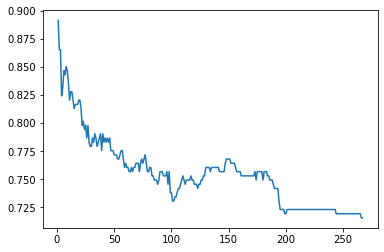

In [23]:
plt.plot(range(1,268),score)

#### From above we can give inference that if we keep k value equals to 1 then we get highest accuracy on test data that is around 90%.